In [ ]:
#instalando a biblioteca que utilizarei para capturar dados econômicos 
!pip install fredapi

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#importando alguns estilos para os gráficos 
plt.style.use('fivethirtyeight')
paleta_cores = plt.rcParams['axes.prop_cycle'].by_key()['color']

#configurando o pandas para exibir até 500 colunas 
pd.set_option('display.max_columns', 500)

from fredapi import Fred
chave_acesso_siteFred = '4e8113655f8d82ffeb9f25a8c067b790'; #https://fred.stlouisfed.org/docs/api/api_key.html (site para obter uma key)

In [21]:
#criando um "objeto" para a extração de dados do Fred 
obj_fred = Fred(api_key=chave_acesso_siteFred)

In [26]:
#buscando abaixo os dados econômicos para análise, neste caso do índice S&P dos EUA, ordenando por popularidade dos dados

#por padrão serão filtradas 1000 tipos de fonte de dados referente o S&P, porém, é possível alterar o limite para mais ou menos 
# usando o parametro limit da função search
fontes_sp = obj_fred.search('S&P', order_by='popularity')

In [ ]:
fontes_sp.head()

In [29]:
#extraindo dados brutos da fonte própria do SP500 que é atualizada diáriamente após fechamento do mercado
# é possível definir um período de extração com alguns parametros na função de inicio e fim da leitura
dados_sp500 = obj_fred.get_series(series_id='SP500')
dados_sp500

2013-07-01    1614.96
2013-07-02    1614.08
2013-07-03    1615.41
2013-07-04        NaN
2013-07-05    1631.89
               ...   
2023-06-26    4328.82
2023-06-27    4378.41
2023-06-28    4376.86
2023-06-29    4396.44
2023-06-30    4450.38
Length: 2610, dtype: float64

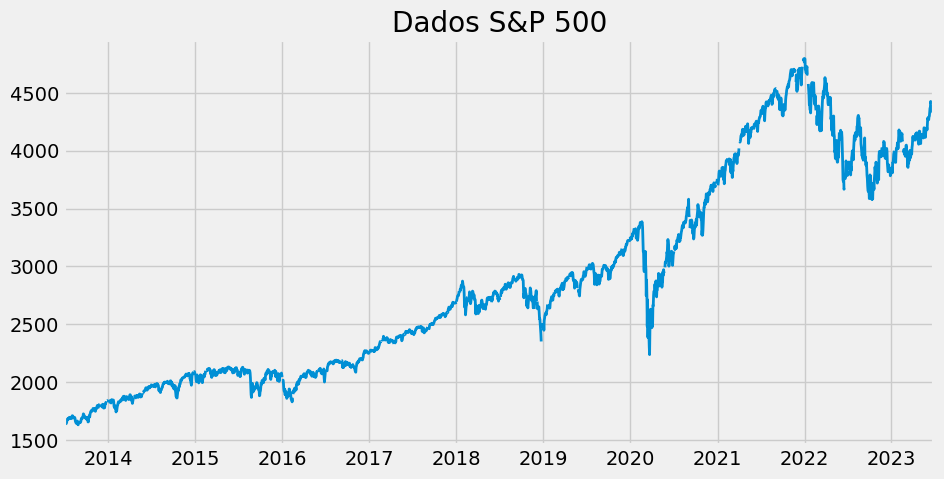

In [41]:
#plotando um gráfico simples para visualização dos dados capturados

#parametro lw serve para ajustar a linha para melhor detalhe da movimentação
dados_sp500.plot(figsize = (10,5), title='Dados S&P 500', lw=2) 
plt.show()

In [45]:
#buscando fontes que me forneçam dados sobre desemprego em % 
fonts_desemprego = obj_fred.search('unemployment', order_by='popularity')
fonts_desemprego.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2023-07-02,2023-07-02,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-05-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-06-13 07:44:03-05:00,93,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2023-07-02,2023-07-02,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:02-05:00,93,The unemployment rate represents the number of...
ICSA,ICSA,2023-07-02,2023-07-02,Initial Claims,1967-01-07,2023-06-24,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-06-29 07:33:01-05:00,83,An initial claim is a claim filed by an unempl...
PAYEMS,PAYEMS,2023-07-02,2023-07-02,"All Employees, Total Nonfarm",1939-01-01,2023-05-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-06-02 07:47:01-05:00,81,"All Employees: Total Nonfarm, commonly known a..."
CES0500000003,CES0500000003,2023-07-02,2023-07-02,"Average Hourly Earnings of All Employees, Tota...",2006-03-01,2023-05-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2023-06-02 07:47:01-05:00,77,The series comes from the 'Current Employment ...


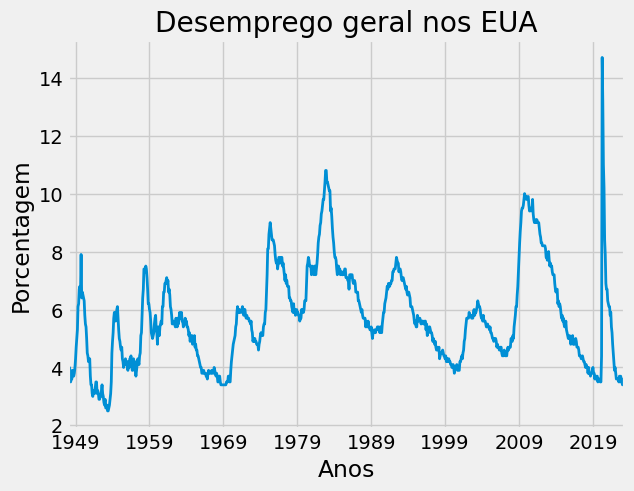

In [51]:
dados_desemp = obj_fred.get_series('UNRATE') #dados captados em % 
graph = dados_desemp.plot(title='Desemprego geral nos EUA', lw=2)
graph.set_xlabel('Anos')
graph.set_ylabel('Porcentagem')
plt.show()

In [122]:
#refinando a busca por desemprego, porém, agora trabalhar com o desemprego em regiões/estados por mês 
desemp_regiao_filt = obj_fred.search('unemployment rate state', filter=('frequency','Monthly') )
desemp_regiao_filt

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-07-02,2023-07-02,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:02-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-07-02,2023-07-02,Unemployment Rate,1948-01-01,2023-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-06-02 07:45:02-05:00,53,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-07-02,2023-07-02,Unemployment Level,1948-01-01,2023-05-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-06-02 07:46:04-05:00,65,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2023-07-02,2023-07-02,Unemployment Rate - Black or African American,1972-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-02 07:46:06-05:00,65,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2023-07-02,2023-07-02,Unemployment Rate - Black or African American,1972-01-01,2023-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-06-02 07:45:20-05:00,11,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PROV244URN,PROV244URN,2023-07-02,2023-07-02,"Unemployment Rate in Providence-Warwick, RI-MA...",1990-01-01,2023-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-06-28 10:17:03-05:00,2,None
PACUMB0URN,PACUMB0URN,2023-07-02,2023-07-02,"Unemployment Rate in Cumberland County, PA",1990-01-01,2023-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-06-28 10:11:13-05:00,2,These data come from the Current Population Su...
CALAKE3URN,CALAKE3URN,2023-07-02,2023-07-02,"Unemployment Rate in Lake County, CA",1990-01-01,2023-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-06-28 10:25:10-05:00,2,These data come from the Current Population Su...


In [127]:
#aplicando um "filtro" usando a função query para buscar somente dados sazonais ajustados em %
desemp_regiao_filt = desemp_regiao_filt.query('seasonal_adjustment == "Seasonally Adjusted" and units=="Percent" ')

In [128]:
# aplicando um novo filtro no data frame gerado anteriormente para buscar no title dos dados a palavra Unemployment Rate
# refinando assim a busca dos dados brutos sobre desemprego
desemp_regiao_filt = desemp_regiao_filt.loc[ desemp_regiao_filt['title'].str.contains('Unemployment Rate') ]

In [154]:
#capturando os dados de desemprego de todos os Id's(fontes de dados) presentes no último data frame criado com os filtros aplicados

#criando uma lista que irá receber todos os resultados, isso servirá para criar um data frame com os resultados do desemprego por região
todos_resultados_estados = [] 

for ids in desemp_regiao_filt.index:
    resultados_ids = obj_fred.get_series(ids)
    resultados_ids = resultados_ids.to_frame(name=ids) #convertendo a saida de resultado que veio no formato de series para frame do pandas
    todos_resultados_estados.append(resultados_ids)  
    


In [162]:
#juntando todas as colunas pegas em um único data frame e dropando as colunas que não correspondem a informação limpa sobre os estados
data_resultado_regioes = pd.concat(todos_resultados_estados, axis=1).drop([
    'LNS14000006','M0892AUSM156SNBR','M0892BUSM156SNBR','LNS14000031','LNS14000002','U2RATE','LNS14000002','LNS14000024',
    'LNS14000009','LNS14000001','LNS14000003','LNS14027662','LNS14024887','LNS14027660','LASMT261982000000003','LRUN64TTUSM156S',
    'LNS14032183','LNS14000012','LNS14027659','LNS14000018','LNS14000060','LASMT391746000000003','LRHUTTTTUSM156S','LNS14000028',
    'LNS14000036','CMWRUR','LNS14000032','LNS14027689','LNS14000093','LNS14024230','LNS14000025','LRUNTTTTUSM156S','LRUN24TTUSM156S',
    'LNS14000315','CSOUUR','CNERUR','LNS14000089','LNS14000026','LNS14000029','LNS14200000','CNEWUR','LNS14100000','LNS14000048',
    'LNS14000014','LNS14000150'], axis=1) 

In [ ]:
#dropando os dados nulos que estão presentes no data frame
data_resultado_regioes = data_resultado_regioes.drop('UNRATE', axis=1).dropna()

In [181]:
data_resultado_regioes

,CAUR,TXUR,NYUR,FLUR,OHUR,NJUR,GAUR,MIUR,ILUR,MNUR,NCUR,ALUR,PAUR,MOUR,KYUR,MAUR,WIUR,COUR,LAUR,NMUR,TNUR,SCUR,VAUR,ORUR,WAUR,UTUR,AZUR,ARUR,WVUR,INUR,MDUR,PRUR,AKUR,NVUR,IAUR,KSUR,HIUR,NEUR,OKUR,CTUR,NDUR,MSUR,DCUR,MEUR,MTUR,WYUR,NHUR,DEUR,SDUR,RIUR,IDUR,VTUR,CWSTUR
1976-01-01,9.2,5.8,10.3,9.7,8.1,10.3,8.4,9.9,6.6,6.0,6.4,6.6,8.0,5.9,5.6,10.5,5.8,5.8,6.3,8.6,6.0,7.4,6.1,9.5,8.5,5.8,10.2,7.3,7.5,6.6,6.4,19.6,7.1,9.2,4.3,4.2,9.8,3.3,5.8,9.8,3.4,6.7,8.7,8.7,5.8,4.1,6.5,8.0,3.3,7.8,5.6,8.6,8.6
1976-02-01,9.2,5.8,10.3,9.7,8.1,10.3,8.4,9.9,6.6,6.0,6.4,6.6,8.1,5.9,5.6,10.5,5.8,5.7,6.3,8.7,6.0,7.4,6.1,9.5,8.5,5.9,10.2,7.3,7.5,6.6,6.4,19.5,7.1,9.2,4.3,4.2,9.8,3.3,5.8,9.8,3.4,6.7,8.7,8.7,5.8,4.1,6.5,8.0,3.3,7.8,5.6,8.6,8.6
1976-03-01,9.1,5.9,10.2,9.6,8.1,10.3,8.4,9.9,6.6,5.9,6.4,6.6,8.1,5.9,5.6,10.5,5.7,5.7,6.3,8.7,6.0,7.3,6.1,9.4,8.4,5.8,10.1,7.3,7.5,6.5,6.4,19.3,7.0,9.2,4.3,4.2,9.8,3.3,5.8,9.8,3.4,6.6,8.6,8.6,5.8,4.1,6.5,8.0,3.2,7.7,5.6,8.6,8.6
1976-04-01,9.1,5.9,10.2,9.5,8.0,10.3,8.3,9.8,6.6,5.8,6.3,6.5,8.1,6.0,5.6,10.3,5.6,5.6,6.4,8.6,6.0,7.2,6.0,9.2,8.5,5.8,10.0,7.2,7.5,6.3,6.4,19.0,6.9,9.0,4.2,4.2,9.7,3.2,5.8,9.6,3.5,6.4,8.5,8.6,5.8,4.0,6.5,8.1,3.1,7.7,5.6,8.6,8.5
1976-05-01,9.0,5.9,10.1,9.3,7.8,10.3,8.1,9.6,6.6,5.7,6.1,6.4,8.1,6.0,5.5,10.1,5.5,5.6,6.5,8.6,5.9,7.0,5.9,9.1,8.5,5.7,9.8,7.1,7.4,6.0,6.5,18.9,6.9,8.9,4.1,4.2,9.4,3.1,5.7,9.4,3.6,6.3,8.4,8.5,5.8,3.9,6.5,8.3,3.1,7.7,5.6,8.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,4.2,3.9,4.2,2.6,4.0,3.4,3.1,4.3,4.5,2.9,3.8,2.6,4.3,2.7,3.9,3.5,2.9,2.8,3.5,3.5,3.5,3.2,3.2,4.8,4.6,2.4,3.8,3.4,3.9,3.1,3.0,6.0,3.8,5.5,3.0,2.9,3.6,2.5,3.1,3.9,2.1,3.9,4.5,2.9,2.5,3.9,2.8,4.6,2.1,3.1,2.7,2.9,4.0
2023-02-01,4.4,4.0,4.2,2.6,3.9,3.5,3.1,4.3,4.5,3.0,3.6,2.5,4.4,2.6,3.9,3.7,2.7,2.9,3.6,3.6,3.5,3.2,3.2,4.7,4.6,2.4,3.7,3.2,3.7,3.1,2.9,6.0,3.8,5.5,2.9,2.9,3.6,2.3,3.0,4.0,2.1,3.7,4.7,2.8,2.4,3.8,2.7,4.6,2.1,3.1,2.6,2.8,4.1
2023-03-01,4.4,4.0,4.1,2.6,3.8,3.5,3.1,4.1,4.4,2.8,3.5,2.3,4.2,2.5,3.8,3.5,2.5,2.8,3.6,3.5,3.4,3.2,3.2,4.4,4.5,2.4,3.5,3.0,3.4,3.1,2.7,6.0,3.7,5.5,2.8,2.9,3.5,2.1,3.0,3.9,2.1,3.5,4.8,2.6,2.3,3.7,2.4,4.4,1.9,3.1,2.6,2.7,4.0
2023-04-01,4.5,4.0,4.0,2.6,3.7,3.5,3.1,3.8,4.2,2.8,3.4,2.2,4.1,2.5,3.7,3.1,2.4,2.8,3.6,3.5,3.3,3.1,3.1,4.0,4.3,2.3,3.4,2.8,3.3,3.0,2.5,6.0,3.7,5.4,2.7,2.9,3.3,2.0,2.9,3.8,2.1,3.4,5.0,2.4,2.3,3.5,2.1,4.3,1.9,3.0,2.6,2.4,4.0


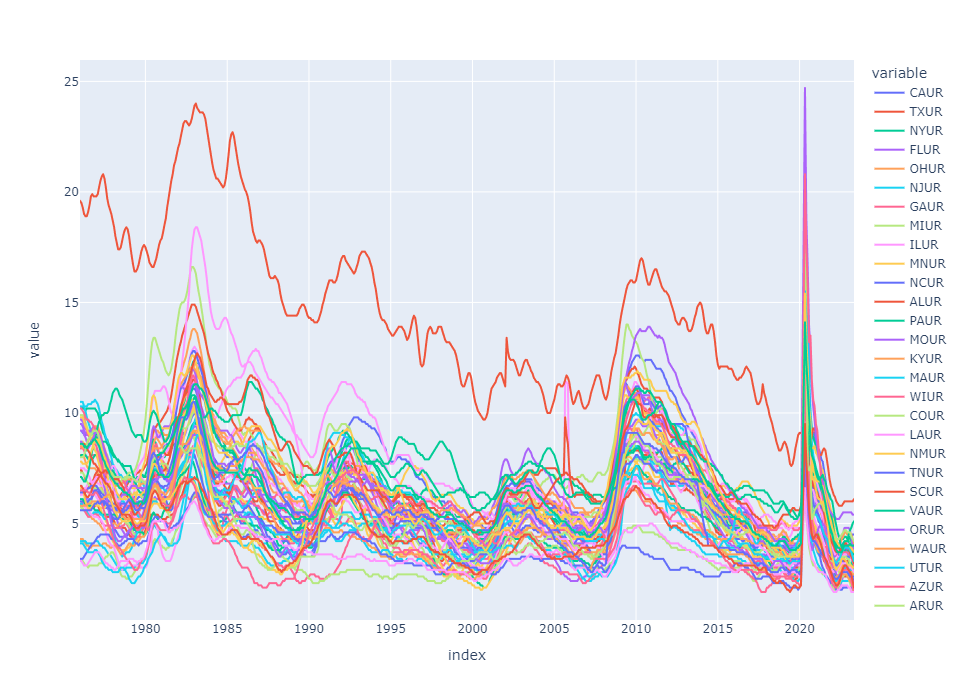

In [174]:
#plotando as informações de cada região em um gráfico interativo onde pode-se selecionar os dados de várias regiões para comparativo
px.line(data_resultado_regioes, width=1000, height=700)

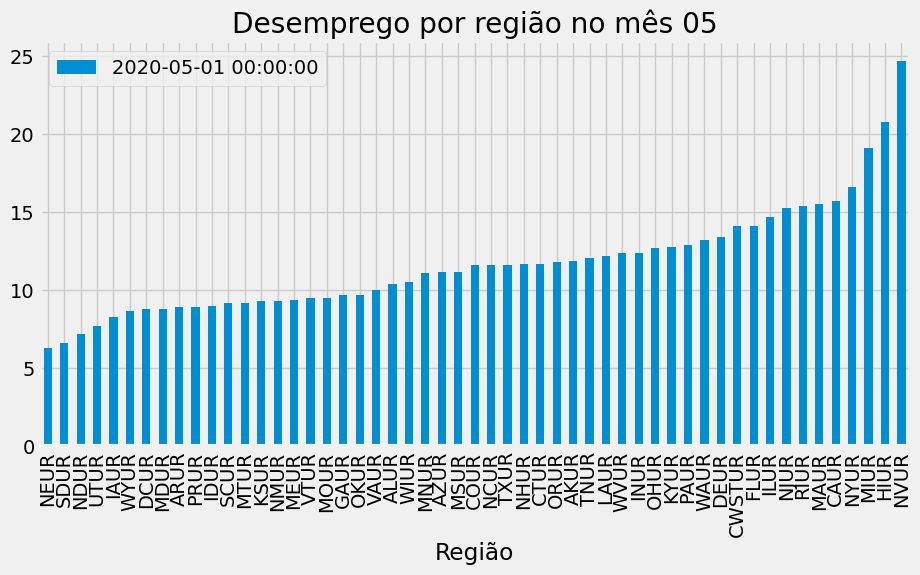

In [200]:
#Aplicando um filtro especifico de uma linha somente do ano de 2020 para verificar o pico mostrado no gráfico 

grafico = data_resultado_regioes.loc[data_resultado_regioes.index == '2020-05-01'].T.sort_values('2020-05-01').plot(kind='bar', figsize=(10,5), title='Desemprego por região no mês 05')
grafico.set_xlabel('Região')
plt.show()

#é possível verificar que a região com maior desemprego no mês de maio foi em Nevada